### Обработка данных для машинного обучения

#### Цель работы

Познакомиться с основными приемами дескриптивного анализа данных для подготовки к машинному обучению

#### Задания для выполнения

1. На сайте [https://www.kaggle.com/datasets](https://www.kaggle.com/datasets) выбрать набор данных каждому студенту индивидуально. Лучше всего выбирать датасеты в предметной области исходя из личных предпочтений. Не стоит выбирать слишком большие наборы данных (лучше не более 100 Мб). 
2. В начале анализа следует привести общую характеристику набора данных: количество наблюдений, признаков, предметная область, содержание признаков, характер целевой переменной, задача обучения (регрессия, классификация, количество классов).
3. Провести в Jupyter средствами pandas, sklearn, seaborn описательный анализ выбранного набора включающего (но не ограниченного) следующие шаги:
    1. исследование шкалы измерения каждого существенного признака;
    2. построение эмпирического распределения каждого существенного признака;
    3. анализ количества и распределения отсутствующих значений;
    4. построение совместного распределения каждого признака и целевой переменной;
    5. построение корреляционной матрицы.
4. По каждому пункту анализа необходимо сделать содержательный вывод.
5. Провести подготовительную обработку данных, включающую следующие шаги:
    6. удаление или заполнение отсутствующих значений;
    7. приведение всех признаков к бинарной либо числовой шкале;
    8. удаление несущественных либо избыточных признаков;
    9. другие необходимые действия в зависимости от набора данных и задачи (группировка, удаление аномалий, и др.).
6. Количественные характеристики датасета необходимо также привести после его обработки.

#### Контрольные вопросы

1. Какие существуют методы устранения отсутствующих значений в наборе данных? Исходя из чего нужно применять различные методы?
2. Что показывает коэффициент корреляции? В чем его ограничения?
3. Какие признаки можно считать несущественными?
4. Какие методы преобразования категориальных признаков в численные существуют?
5. Какие статистические распределения чаще всего встречаются в реальных задачах?
6. Что такое совместное и условное распределение?

#### Дополнительные задания

1. Использовать несколько моделей машинного обучения для решения поставленной задачи.
2. Использовать методику замеры времени обучения каждой использованной модели.
3. Сформировать сводную таблицу результатов обучения, включающую следующие данные:
    1. время обучения модели;
    2. accuracy;
    3. precision;
    4. recall;
    5. f1-score.


#### Задания для выполнения



1. На сайте [https://www.kaggle.com/datasets](https://www.kaggle.com/datasets) выбрать набор данных каждому студенту индивидуально. Лучше всего выбирать датасеты в предметной области исходя из личных предпочтений. Не стоит выбирать слишком большие наборы данных (лучше не более 100 Мб). 


In [1]:
# https://www.kaggle.com/code/faelk8/covid-19-prediction-of-death/data

In [52]:
import pandas as pd
import numpy as np

covid = pd.read_csv('Covid Data.csv')
covid.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


2. В начале анализа следует привести общую характеристику набора данных: количество наблюдений, признаков, предметная область, содержание признаков, характер целевой переменной, задача обучения (регрессия, классификация, количество классов).


In [3]:
covid.shape

(1048575, 21)

In [4]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [5]:
covid["DEATH"] = [0 if each=="9999-99-99" else 1 for each in covid.DATE_DIED]
round(len(covid[covid["DEATH"] == 1])/len(covid["DEATH"]), 4)

0.0734

Процент погибших людей

3. Провести в Jupyter средствами pandas, sklearn, seaborn описательный анализ выбранного набора включающего (но не ограниченного) следующие шаги:
    1. исследование шкалы измерения каждого существенного признака;
    2. построение эмпирического распределения каждого существенного признака;
    3. анализ количества и распределения отсутствующих значений;
    4. построение совместного распределения каждого признака и целевой переменной;
    5. построение корреляционной матрицы.


D:\anaconda\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


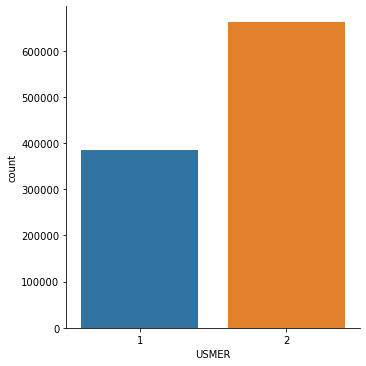

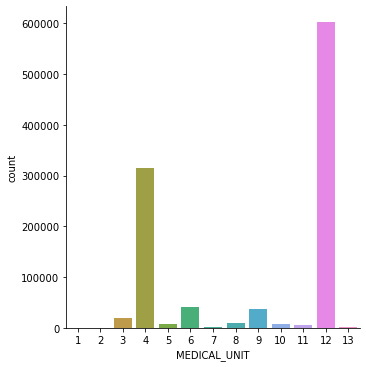

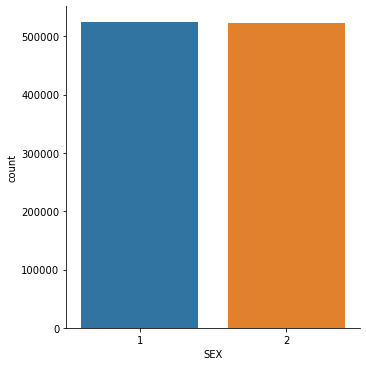

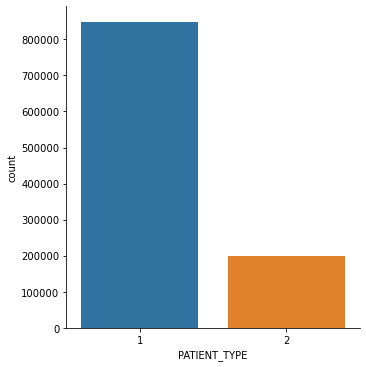

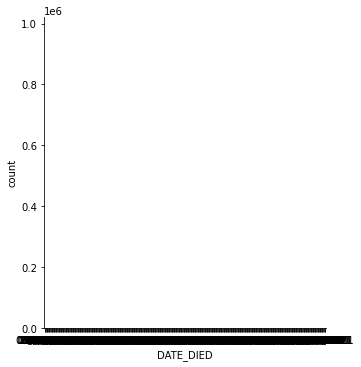

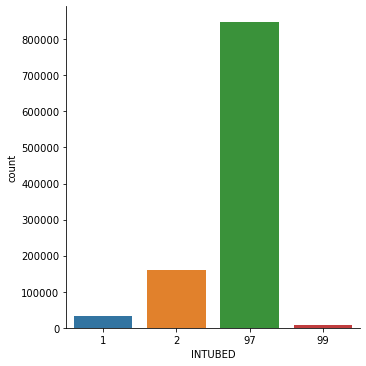

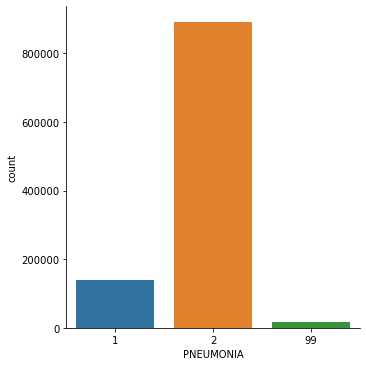

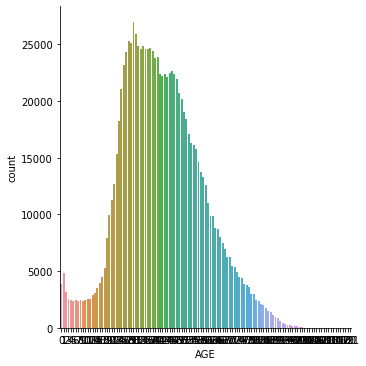

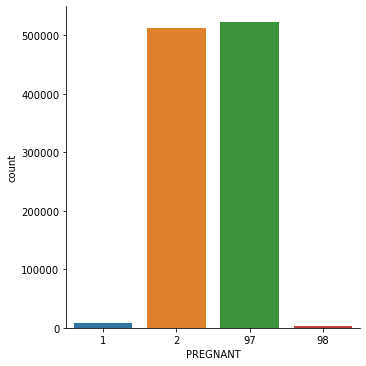

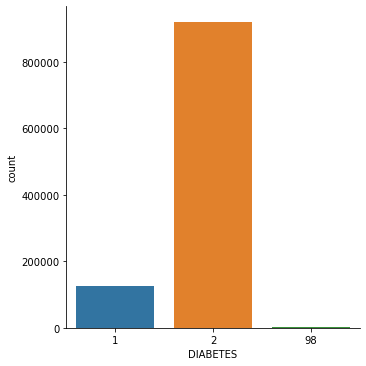

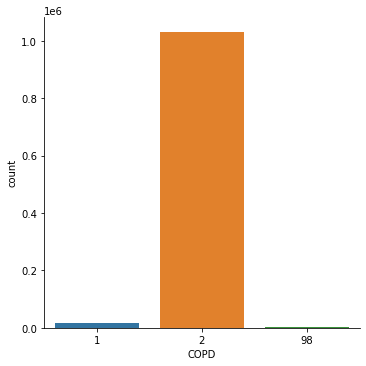

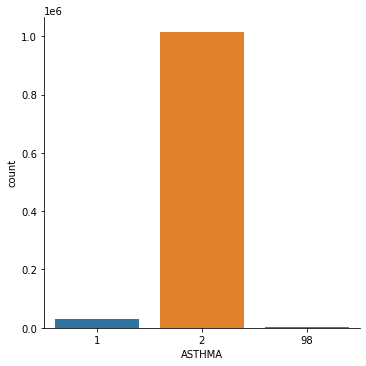

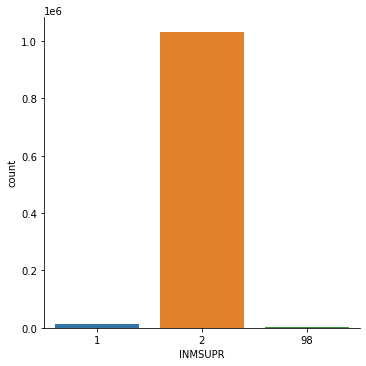

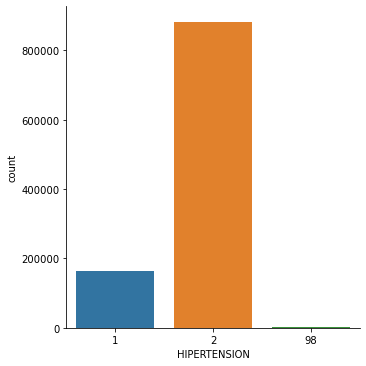

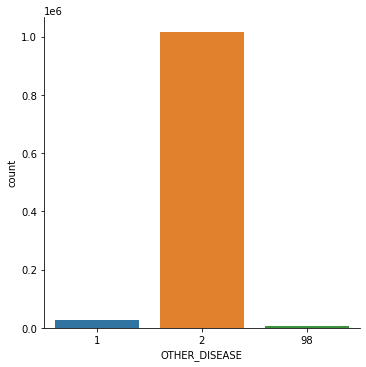

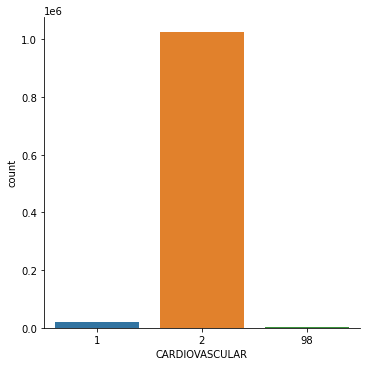

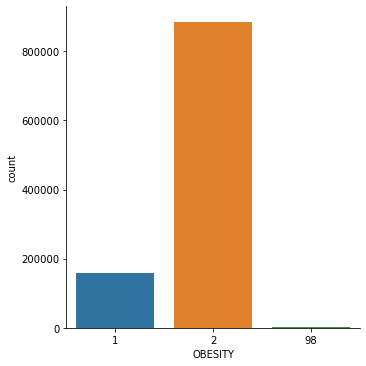

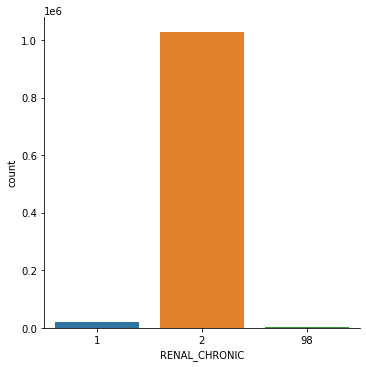

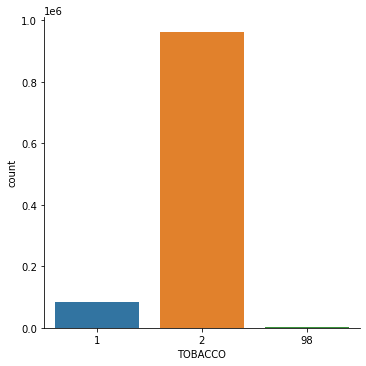

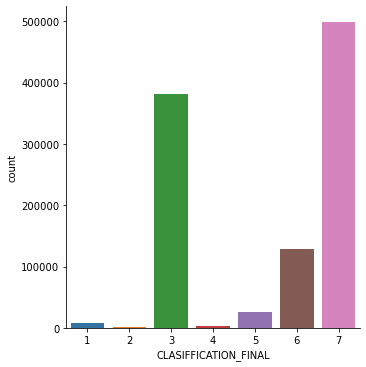

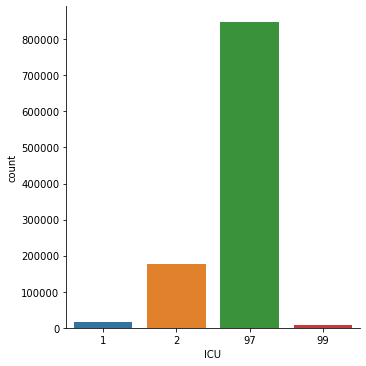

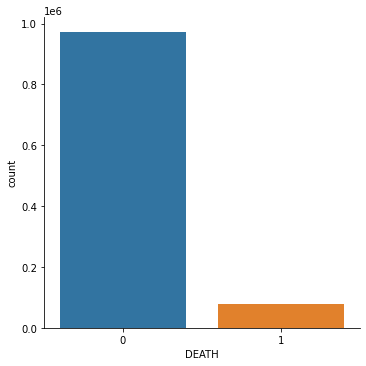

In [6]:
import seaborn as sns

for column in covid.columns:
    sns.catplot(data=covid, x=column, kind="count")

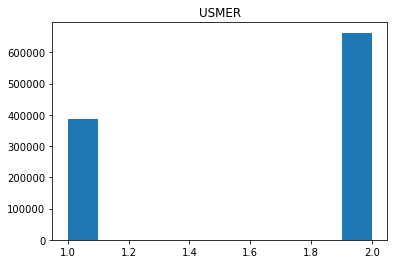

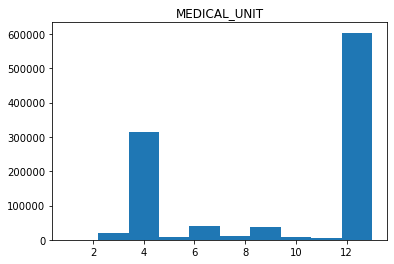

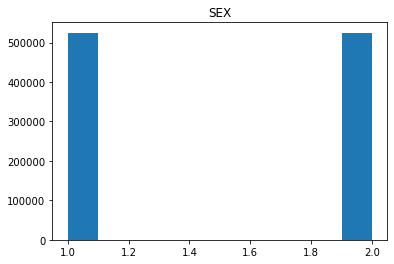

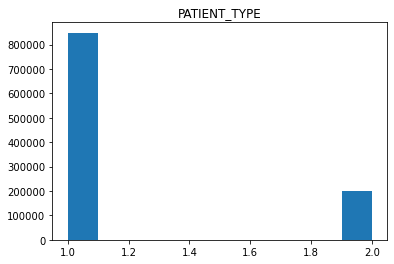

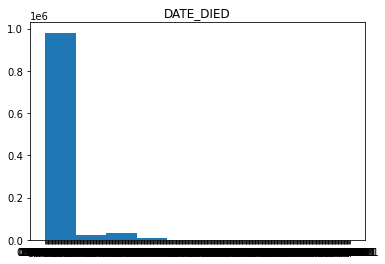

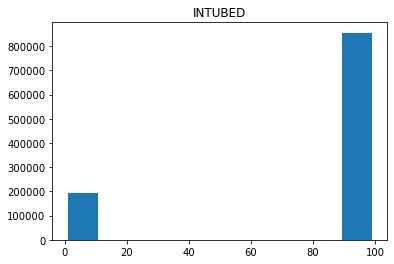

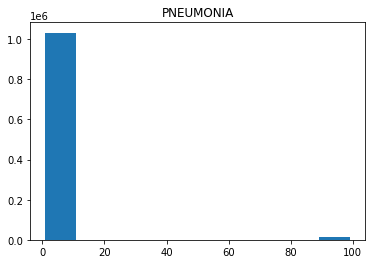

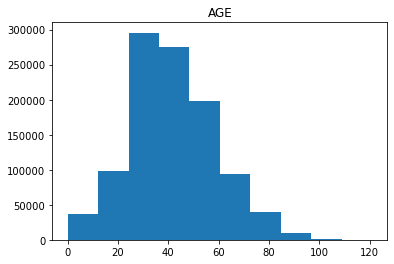

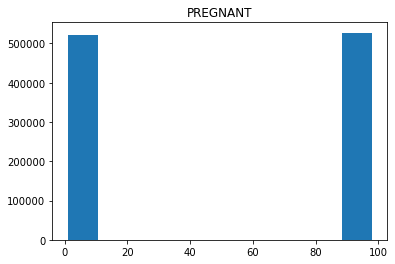

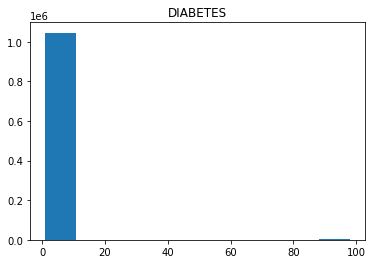

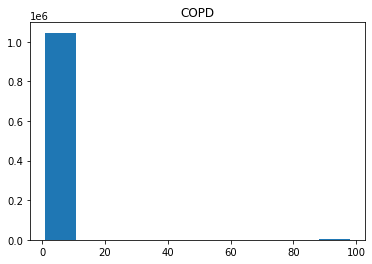

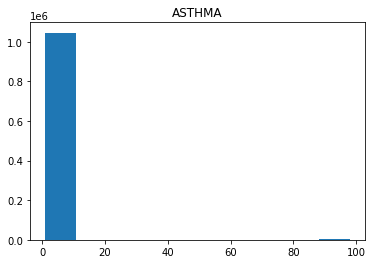

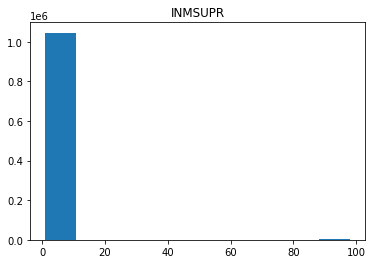

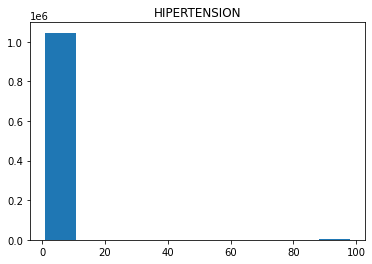

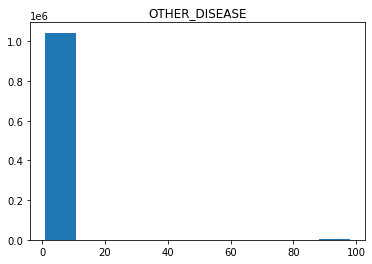

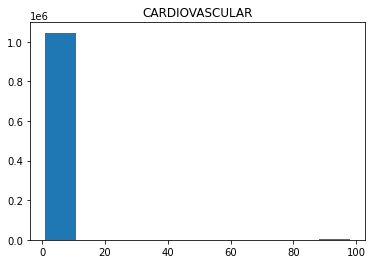

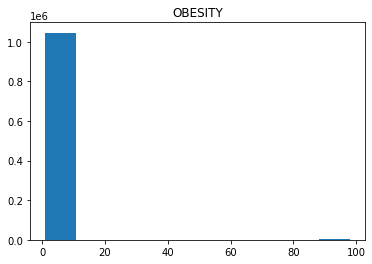

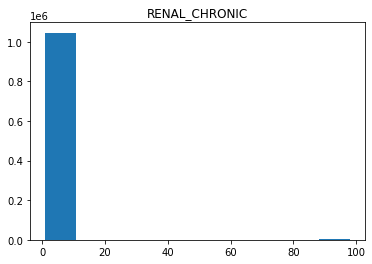

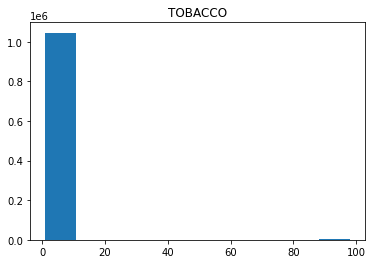

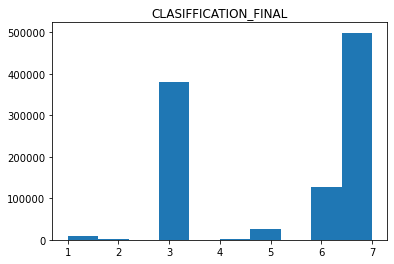

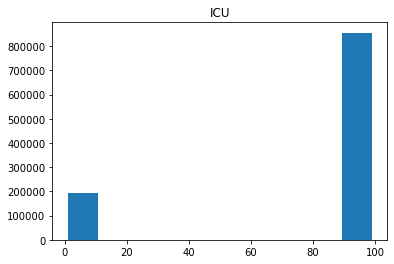

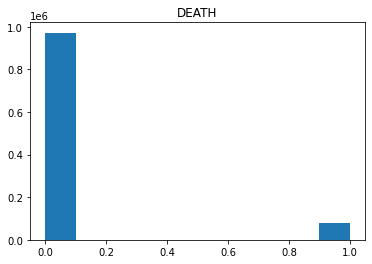

In [7]:
import matplotlib.pyplot as plt

for column in covid.columns:
    plt.hist(covid[column])
    plt.title(column)
    plt.show()

Из гистограмм видно, что все данные уже переведены в числа и чаще всего являются категориальными, где 1 это наличие признака, а 2 его отсутствие

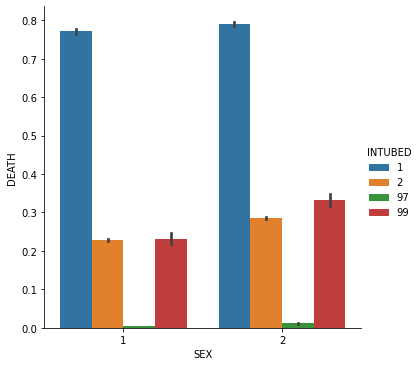

In [8]:
sns.catplot(data=covid, x="SEX", y="DEATH", hue="INTUBED", kind="bar")

1 - female. 2 - male

1 means "yes" and 2 means "no". values as 97 and 99 are missing data

Можно сделать вывод, что люди, подключенные к аппарату ИВЛ, умерали гораздо чаще

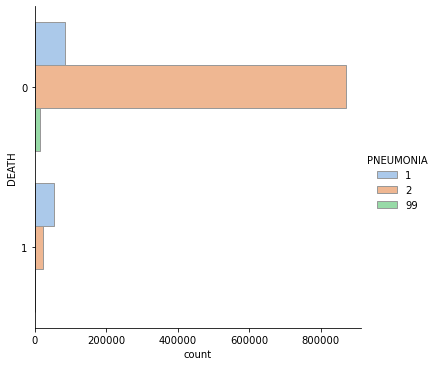

In [9]:
sns.catplot(data=covid, y="DEATH", hue="PNEUMONIA", kind="count", palette="pastel", edgecolor=".6")

Если у больного была пневмония, то с гораздо большей долей вероятности он умирал

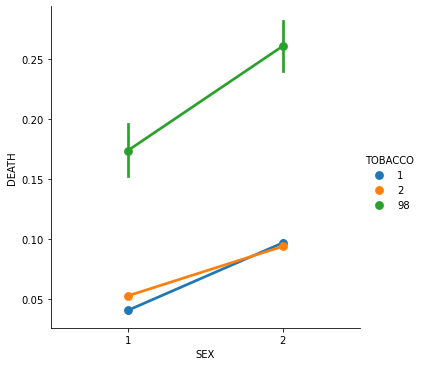

In [10]:
sns.catplot(data=covid, x="SEX", y="DEATH", hue="TOBACCO", kind="point")

Если человек курил, то это практически никак не сказывалось на его продолжительности жизни

In [49]:
covid.corr()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
USMER,1.000000,0.127927,-0.001126,-0.190570,0.175457,-0.154950,-0.045088,-0.001469,0.014704,0.011030,0.010814,0.003234,0.014830,-0.015763,0.010097,0.014567,0.011527,0.010638,0.028840,0.174901
MEDICAL_UNIT,0.127927,1.000000,0.001475,-0.205413,0.205243,-0.046433,-0.082223,0.005300,0.019523,0.014209,0.013312,0.011785,0.020964,0.027453,0.014406,0.019577,0.014751,0.012282,0.079981,0.205141
SEX,-0.001126,0.001475,1.000000,0.089505,-0.089943,-0.012131,0.028367,0.992713,0.008888,0.009372,0.010415,0.007999,0.009257,0.009039,0.008174,0.009858,0.008249,0.004919,-0.057782,-0.089844
PATIENT_TYPE,-0.190570,-0.205413,0.089505,1.000000,-0.976335,0.022966,0.315193,0.088340,0.008743,0.019548,0.023042,0.024924,0.006852,0.036724,0.022175,0.019650,0.018873,0.022123,-0.183370,-0.975810
INTUBED,0.175457,0.205243,-0.089943,-0.976335,1.000000,0.079743,-0.317945,-0.088097,-0.009215,-0.020124,-0.023446,-0.024140,-0.007628,-0.035404,-0.022442,-0.020217,-0.019309,-0.022428,0.193075,0.999434
PNEUMONIA,-0.154950,-0.046433,-0.012131,0.022966,0.079743,1.000000,-0.073127,-0.007284,-0.004484,-0.005618,-0.005392,-0.000802,-0.004799,0.001612,-0.004758,-0.004276,-0.005287,-0.004325,0.075351,0.079691
AGE,-0.045088,-0.082223,0.028367,0.315193,-0.317945,-0.073127,1.000000,0.027257,0.004422,0.019048,0.022715,0.022820,-0.004964,0.022837,0.019489,0.015500,0.020124,0.021263,-0.152637,-0.317813
PREGNANT,-0.001469,0.005300,0.992713,0.088340,-0.088097,-0.007284,0.027257,1.000000,0.014707,0.015736,0.016765,0.014265,0.015335,0.014175,0.014378,0.015895,0.014392,0.010794,-0.057809,-0.087991
DIABETES,0.014704,0.019523,0.008888,0.008743,-0.009215,-0.004484,0.004422,0.014707,1.000000,0.828823,0.829349,0.781108,0.835018,0.634611,0.809417,0.752739,0.812657,0.771763,-0.004739,-0.009223
COPD,0.011030,0.014209,0.009372,0.019548,-0.020124,-0.005618,0.019048,0.015736,0.828823,1.000000,0.908929,0.852273,0.855249,0.687323,0.880097,0.814868,0.884032,0.836097,-0.010336,-0.020146


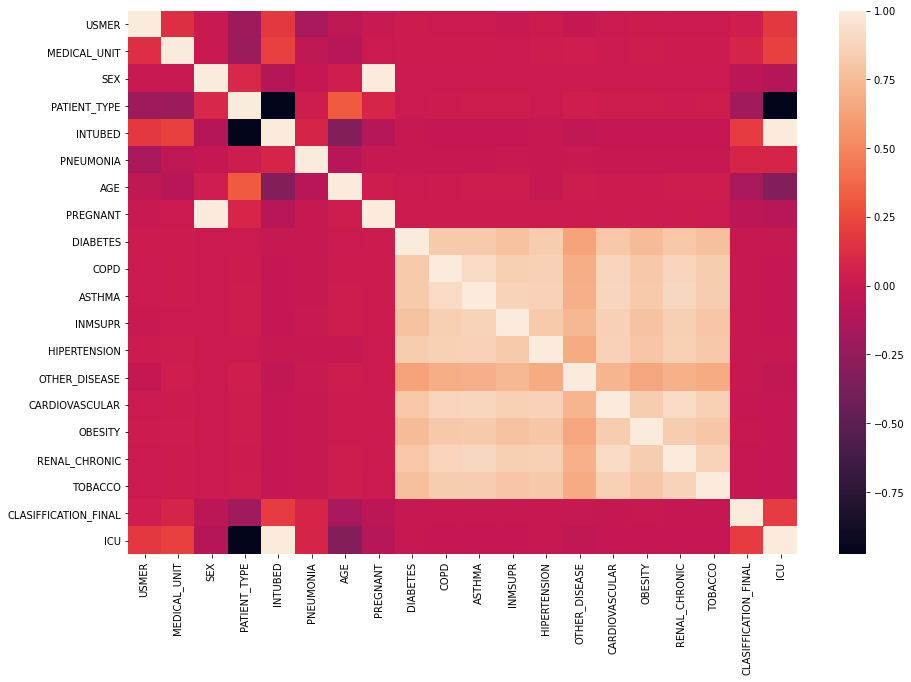

In [50]:
plt.figure(figsize=(15,10))
sns.heatmap(covid.corr());

Видно, что DEATH сильно коррелирует с PATIENT_TYPE (1 - лечение дома, 2 - госпитолизация)

Если была проведена госпитолизация, значит случай был тяжелый и вероятность смерти высока

In [13]:
covid.isna().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
DEATH                   0
dtype: int64

но мы то знаем, что values as 97 and 99 are missing data, поэтому..

In [14]:
def is_na(column):
    a = len(covid[covid[column] == 97])
    b = len(covid[covid[column] == 99])
    return a+b

In [15]:
for column in covid.columns:
    print(column, is_na(column))

USMER 0
MEDICAL_UNIT 0
SEX 0
PATIENT_TYPE 0
DATE_DIED 0
INTUBED 855869
PNEUMONIA 16003
AGE 221
PREGNANT 523511
DIABETES 0
COPD 0
ASTHMA 0
INMSUPR 0
HIPERTENSION 0
OTHER_DISEASE 0
CARDIOVASCULAR 0
OBESITY 0
RENAL_CHRONIC 0
TOBACCO 0
CLASIFFICATION_FINAL 0
ICU 856032
DEATH 0


4. По каждому пункту анализа необходимо сделать содержательный вывод.


5. Провести подготовительную обработку данных, включающую следующие шаги:
    6. удаление или заполнение отсутствующих значений;
    7. приведение всех признаков к бинарной либо числовой шкале;
    8. удаление несущественных либо избыточных признаков;
    9. другие необходимые действия в зависимости от набора данных и задачи (группировка, удаление аномалий, и др.).


Пропущенные значения только в 4 столбцах: INTUBED, PNEUMONIA, PREGNANT, ICU. Все они критериальные и бинарные

In [16]:
covid.nunique()

USMER                     2
MEDICAL_UNIT             13
SEX                       2
PATIENT_TYPE              2
DATE_DIED               401
INTUBED                   4
PNEUMONIA                 3
AGE                     121
PREGNANT                  4
DIABETES                  3
COPD                      3
ASTHMA                    3
INMSUPR                   3
HIPERTENSION              3
OTHER_DISEASE             3
CARDIOVASCULAR            3
OBESITY                   3
RENAL_CHRONIC             3
TOBACCO                   3
CLASIFFICATION_FINAL      7
ICU                       4
DEATH                     2
dtype: int64

In [16]:
def fill_na(column, how):
    global covid
    print(type(covid))
    tmp = covid[covid[column] == 1][column].append(covid[covid[column] == 2][column])
    if how == 'mode':
        md = tmp.mode()
        covid = covid.replace({column:{99:md, 97:md}})
    elif how == 'mean':
        mn = tmp.mean()
        covid = covid.replace({column:{99:mn, 97:mn}})

In [17]:
fill_na('INTUBED', 'mode')
fill_na('PNEUMONIA', 'mode')
fill_na('PREGNANT', 'mode')
fill_na('ICU', 'mode')

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [18]:
for column in covid.columns:
    print(column, is_na(column))

USMER 0
MEDICAL_UNIT 0
SEX 0
PATIENT_TYPE 0
DATE_DIED 0
INTUBED 0
PNEUMONIA 0
AGE 221
PREGNANT 0
DIABETES 0
COPD 0
ASTHMA 0
INMSUPR 0
HIPERTENSION 0
OTHER_DISEASE 0
CARDIOVASCULAR 0
OBESITY 0
RENAL_CHRONIC 0
TOBACCO 0
CLASIFFICATION_FINAL 0
ICU 0
DEATH 0


Удаление лишних столбцов

In [19]:
covid.drop(columns = ['DATE_DIED'], axis = 1, inplace=True )

6. Количественные характеристики датасета необходимо также привести после его обработки.


In [20]:
covid.shape

(1048575, 21)

In [21]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype
---  ------                --------------    -----
 0   USMER                 1048575 non-null  int64
 1   MEDICAL_UNIT          1048575 non-null  int64
 2   SEX                   1048575 non-null  int64
 3   PATIENT_TYPE          1048575 non-null  int64
 4   INTUBED               1048575 non-null  int64
 5   PNEUMONIA             1048575 non-null  int64
 6   AGE                   1048575 non-null  int64
 7   PREGNANT              1048575 non-null  int64
 8   DIABETES              1048575 non-null  int64
 9   COPD                  1048575 non-null  int64
 10  ASTHMA                1048575 non-null  int64
 11  INMSUPR               1048575 non-null  int64
 12  HIPERTENSION          1048575 non-null  int64
 13  OTHER_DISEASE         1048575 non-null  int64
 14  CARDIOVASCULAR        1048575 non-null  int64
 15  OBESITY        

#### Дополнительные задания

1. Использовать несколько моделей машинного обучения для решения поставленной задачи.
2. Использовать методику замеры времени обучения каждой использованной модели.
3. Сформировать сводную таблицу результатов обучения, включающую следующие данные:
    1. время обучения модели;
    2. accuracy;
    3. precision;
    4. recall;
    5. f1-score.

In [22]:
from sklearn.model_selection import train_test_split

target = covid['DEATH']
covid.drop(columns = ['DEATH'], axis = 1, inplace=True )

x_train, x_test, y_train, y_test = train_test_split(covid, target, test_size=0.2, random_state=42)

Нормализация возраста

Позволяет избежать выбросов, чтобы не удалять элементы.

In [23]:
from sklearn import preprocessing

# Масштабирование
covid = preprocessing.normalize(covid)

In [43]:
scores = pd.DataFrame(
    columns=['accuracy', 'precision', 'recall', 'f1_score', 'time'],
    index=[
        
    ]
)

In [25]:
from sklearn import metrics

def get_metrics(y_test, y_pred):
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)
    return pd.Series(
        (accuracy, precision, recall, f1_score),
        index=['accuracy', 'precision', 'recall', 'f1_score']
    )

In [39]:
import time

def model_and_metrics(model):
    start = time.time() # точка отсчета времени
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)  
    end = time.time() - start # время работы программы
    returned = get_metrics(y_test, y_pred).append(pd.Series((end), index = ['time']))
    return returned

In [44]:
from sklearn.linear_model import LogisticRegression

scores.loc[LogisticRegression()] = model_and_metrics(LogisticRegression())

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
# from sklearn.neighbors import KNeighborsClassifier

# scores.loc[KNeighborsClassifier()] = [model_and_metrics(KNeighborsClassifier())]

In [46]:
scores

,accuracy,precision,recall,f1_score,time
LogisticRegression(),0.947696,0.696151,0.49731,0.580166,15.197351
